<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/11%EC%9B%94%2029%EC%9D%BC/11%EC%9B%94_29%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


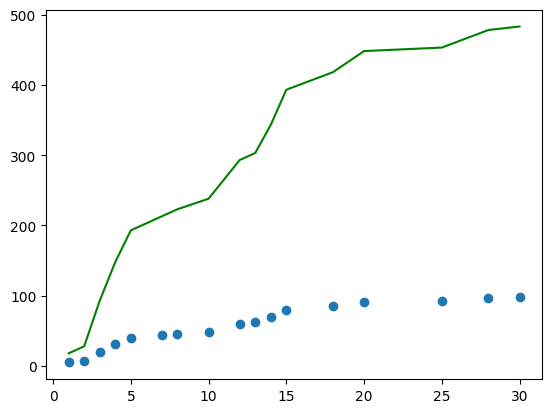

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간(독립변수/Feature), 시험점수(종속변수/Target)
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})
display(df.head())

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])
# plt.plot(df['공부시간(x)'], df['시험점수(t)']*2 + 3, color='r')
plt.plot(df['공부시간(x)'],df['시험점수(t)']*5 - 7, color='g')
# plt.plot(df['공부시간(x)'],df['시험점수(t)']*1 + 8, color='b')
# plt.plot(df['공부시간(x)'],df['시험점수(t)']*4 - 10, color='magenta')
plt.show()

In [ ]:
import numpy as np

# Trainging DataSet
x_data = np.array([1,2,3,4,5]).reshape(5,1)  # 1차원 벡터를 2차원으로 재형성
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# model -> y = Wx + b
# rand() -> 0과 1사이의 난수를 균등분포에서 발생시킴!
W = np.random.rand(1,1)
b = np.random.rand(1)  # 1차원으로 잡아도 numpy는 계산시 자동으로 shape 맞춰주기 때문에 상관 없음

# loss function
def loss_func(input_data):

    input_W = input_data[0]
    input_b = input_data[1]

    # y = XW + b 코드로 표현
    y = np.dot(x_data, input_W) + input_b

    return np.mean(np.power((t_data - y), 2))  # 평균제곱 오차 구하기

# 미분해주는 함수가 있어야 해요!
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# 학습이 다 종료되면(모델이 다 만들어지면)
# 예측작업을 해야해요! 예측을 해주는 함수를 하나 정의
def predict(x):
    return np.dot(x,W)+b

# learning rate 정의
learning_rate = 1e-4

# 학습을 진행(반복해서)
for step in range(300000):

    # 현재 W는 2차원, b는 1차원이에요!
    # 그런데 이게 loss 함수안으로 들어갈 때는 1차원 안에 두 값이
    # 순서대로 들어있어야해요!
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)  # axis=0 설정 시, 옆으로 합쳐짐
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    w = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    # 확인작업
    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss:{loss_func(input_param)}')


W : [[0.55937873]], b : [0.46472674], loss:27.75199935692162
W : [[0.55937873]], b : [5.3098314], loss:4.15092412944251
W : [[0.55937873]], b : [5.32183401], loss:4.150779293355379
W : [[0.55937873]], b : [5.32186374], loss:4.1507792924665425
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466537
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466536
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466536
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466536
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466536
W : [[0.55937873]], b : [5.32186381], loss:4.150779292466536


KeyboardInterrupt: ignored

In [ ]:
predict_result = predict(np.array([7]).reshape(1,1))
print(predict_result)


[[9.23751492]]


In [ ]:
# Tensorflow Keras로 구현

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Traingin Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)  # 1차원 벡터를 2차원으로 재형성
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# Model 생성
model = Sequential()

# Model 안에 layer 생성
model.add(Flatten(input_shape=(1,)))  # input_shape = 그림 속 모델 안 동그라미 의미 / input_shape 뒤에는 튜플 형태로 와야함, ()안에는 개수
model.add(Dense(units=1,
                activation='linear'))

# 모델이 완성되었으면 compile 옵션들을 설정해야 해요!
model.compile(optimizer=SGD(learning_rate = 1e-2),
              loss='mse')

# 모델의 학습
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=0)  # verbose -> 몇번 반복때 마다 출력할지 설정, 여기서는 0이면 출력안함, 1이면 5000번 출력



In [ ]:
# 예측을 해보아요!
print(model.predict(np.array([[10]])))


1/1 [==============================] - 0s 74ms/step
[[21.000032]]


In [ ]:
# sklearn 구현
# sklearn은 일반 사람들도 쉽고 편하게 머신러닝을 할 수 있도록
# 모델을 제공해줘요!

import numpy as np
from sklearn import linear_model

# Traingin Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)  # 1차원 벡터를 2차원으로 재형성
t_data = np.array([3,5,7,9,11]).reshape(5,1)

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data,
                  t_data)

sklearn_model.predict(np.array([[10]]))

array([[21.]])

# ozone.csv 파일 이용한 머신러닝 모델 만들기

In [ ]:
# python 구현

# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 수치미분 함수가 있어야 함
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
# display(df)

# 아직은 single linear regression 중이기 때문에
# 독립변수 1개만 사용 -> Temp만 사용
# 종속변수는 Ozone을 사용

# 먼저 사용할 데이터 추출해보아요!
training_data = df[['Temp','Ozone']]  # (독립/x_data, 종속/t_data) 형태
# display(training_data)

# 데이터 처리를 좀 해야해요!
# 일단 결측치 처리부터 ~
# 이런 결측치를 처리하는 두 가지 방식이 있어요!
# 1. 결측치 삭제
#    - 데이터 양이 충분히 많을때 삭제
#    - 일반적으로 10만개를 기준으로 데이터량의 많고 적음을 판단
# 2. Imputation을 진행(결측치를 다른 값으로 대체)
#    - 데이터량이 충분하지 않은 경우
#    - 어떤값으로 채워야 하나? -> 기본 통계값(최대, 최소, 평균, 최빈, 중위)
#    - 머신러닝을 이용하여 값을 대체

# 삭제해서 사용하기(2일차니깐 imputation은 나중에)
training_data = training_data.dropna(how='any')
training_data

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0
